# Hortonworks Self-Driving Car

## Project: Color Region to Find Lane Lines

Find lane lines using color selection and triangular region of interest. Color the pixels in the image with the appropriate color AND that are in the region of interest.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
%matplotlib inline

### Helper Function

In [2]:
def read_img(img_path):
    #reading in an image
    image = mpimg.imread(img_path)
    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimensions:', image.shape)
    return image

def get_x_and_ysize(img):
    ysize = img.shape[0]
    xsize = img.shape[1]
    return xsize, ysize
    
def copy_img(img):
    img_copy = np.copy(img)
    return img_copy

def region_of_interest(img, left_bottom, right_bottom, apex):
    imshape = img.shape
    print(imshape[0], ",", imshape[1])
    # Fit lines (y=Ax+B) to identify the 3 sided region of interest
    # np.polyfit() returns coefficients [A,B] of the fit
    fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
    fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
    fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
    
    # Find the region inside the lines
    XX, YY = np.meshgrid(np.arange(0, x_size), np.arange(0, y_size))
    region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
    return region_thresholds

## Build a Lane Finding Pipeline

### Read an Image

This image is: <class 'numpy.ndarray'> with dimensions: (1080, 1920, 3)


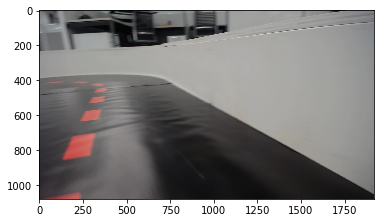

In [3]:
image = read_img("track_images/track_rightside/cam_track_rightside_011419.jpeg")
#image = read_img("track_images/track_middle/cam_track_middle_011419.jpeg")
#image = read_img("track_images/track_leftside/cam_track_leftside_011419.jpeg")

plt.imshow(image)

### Grab x and y size

In [4]:
x_size, y_size = get_x_and_ysize(image)
print(str(x_size) + ", " + str(y_size))

1920, 1080


### Copy Image for Color and Region Selection

In [5]:
color_select = copy_img(image)

In [6]:
region_select = copy_img(image)

In [7]:
line_image = copy_img(image)

### Set Color Selection Criteria

In [8]:
# Criteria is for selecting the red color
red_threshold = 155
green_threshold = 70
blue_threshold = 70

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

### Set Triangle Region of Interest

In [9]:
imshape = image.shape
print(imshape[0], ",", imshape[1])

1080 , 1920


In [10]:
# Origin (x=0,y=0) is in upper left in image processing
left_bottom = [0,imshape[0]]
right_bottom = [imshape[1],imshape[0]]
apex = [344,440]

1080 , 1920


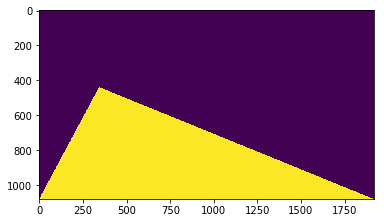

In [11]:
region_thresholds = region_of_interest(image, left_bottom, right_bottom, apex)
plt.imshow(region_thresholds)

### Mask Pixels That Are Below Threshold

In [12]:
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])

### Mask Color Selection

In [13]:
color_select[color_thresholds] = [0,0,0]

### Color Pixels Inside Region of Interest Green

In [14]:
# Color pixels green which are inside the region of interest
region_select[region_thresholds] = [0, 255, 0]

### Find Where Image is Colored Red and In Region of Interest

In [15]:
# invert color_thresholds to flip 0s to 1s
# bitwise AND it with region_thresholds to return
# an array image where only the lane lines
# with the appropriate color and in our region are detected
line_image[~color_thresholds & region_thresholds] = [255, 255, 255]

### Display Color Selection for Red Lane Lines

Applied Color Selection to Red Lane Lines

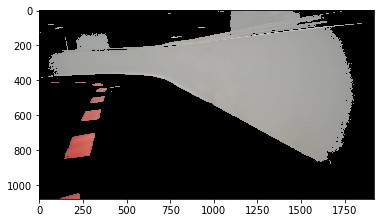

In [16]:
plt.imshow(color_select)

### Display Triangular Region of Interest

The triangular region of interest in the image was set based on
the fact that the car's front facing camera that took the image is
mounted in a fixed position on the car, such that the lane lines
will appear in the same general region of the image.

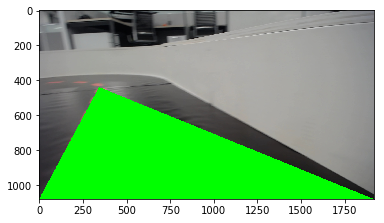

In [17]:
plt.imshow(region_select)

### Display Detected Lane Lines

The lane lines were colored green in following image because the
pixels were the appropriate color (red) and in the region of interest

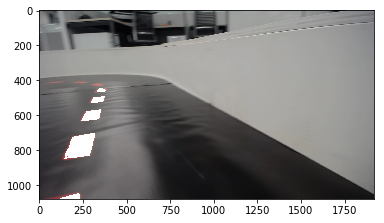

In [18]:
plt.imshow(line_image)